<a href="https://colab.research.google.com/github/sandeepProject/ICTTestRepo/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent.
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

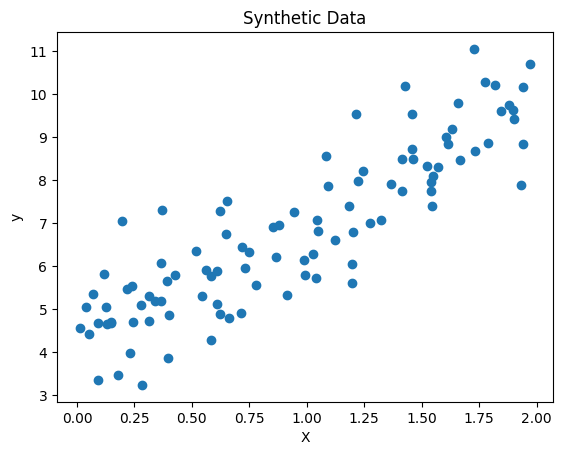

In [23]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Do Train-Test Split (75%-25%)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Total samples: 100
Training samples: 75
Testing samples: 25


## Do the Linear Regression with Scikit-Learn Library

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model (only training data)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

print(f"Intercept (b): {model.intercept_[0]:.2f}")
print(f"Coefficient (w): {model.coef_[0][0]:.2f}")

MSE: 0.707061195070344
R2: 0.8310990846073661
Intercept (b): 4.17
Coefficient (w): 2.73


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [26]:
from sklearn.linear_model import Ridge, Lasso
import pandas as pd

# Initialize models (alpha is the regularization strength)
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)

# Fit models
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

# Metrics calculation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

data = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "MSE": [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ]
}

df_comparison = pd.DataFrame(data)
print("--- Model Performance Comparison ---")
print(df_comparison.round(4).to_string(index=False))


--- Model Performance Comparison ---
            Model    MSE  R2 Score
Linear Regression 0.7071    0.8311
 Ridge Regression 0.7284    0.8260
 Lasso Regression 0.7992    0.8091


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:

Let the error for a single point be $$ u_i = y_i - (mx_i + c) $$
Then the Loss is $$ \frac {1}{N} \sum_{i=1}^{N} u_i^2 $$
Deriving the Gradient for m : ∂Loss/∂m

Applying the chain rule :
$$ \frac{∂Loss}{∂m} = \frac{∂Loss}{∂u_i} * \frac{∂u_i}{∂m} $$

Outer derivative: The derivative of $$ u_i^2 \text { is } 2u_i $$
Inner derivative: The derivative of $$ (y_i - mx_i - c) \text { with respect to m is } -x_i  $$

Combining them: $$ \frac{∂Loss}{∂m} = \frac {1}{N} \sum_{i=1}^{N} 2(y_i - (mx_i +c))*(-x_i) $$

Final simplified form: $$ \frac{∂Loss}{∂m} = -\frac {2}{N} \sum_{i=1}^{N} x_i(y_i - \hat y_i) $$

Deriving the Gradient for c : ∂Loss/∂c

Applying the chain rule again:
$$ \frac{∂Loss}{∂c} = \frac{∂Loss}{∂u_i} * \frac{∂u_i}{∂c} $$

Outer derivative: The derivative of $$ u_i^2 \text { is } 2u_i$$
Inner derivative: The derivative of $$ (y_i - mx_i - c) \text { with respect to c is } -1  $$

Combining them:$$ \frac{∂Loss}{∂c} = \frac {1}{N} \sum_{i=1}^{N} 2(y_i - (mx_i +c))*(-1) $$

Final simplified form:$$ \frac{∂Loss}{∂c} = \frac -{2}{N} \sum_{i=1}^{N} (y_i - \hat y_i) $$



## 🧠 Custom Linear Regression Class

In [27]:

class MyLinearRegression:
    def __init__(self):
      self.m=0 # slope
      self.c=0 # Intercept
      self.coef_=None # Coefficient
      self.loss_history = []

    def fit(self, X, y, lr=0.01, n_iters=1000):
      N = float(len(X))
      for _ in range(n_iters):
        y_pred = (self.m * X) + self.c
        # Record the loss at each step
        # Append average MSE for this epoch
        loss = np.mean((y - y_pred)**2)
        self.loss_history.append(loss)
        # Calculate gradients using the derived formulas
        dm = (2/N) * np.sum(X * (y_pred - y)) # here -(2/N) changed to +(2/N) because (y-y_pred) changed to (y_pred - y)
        dc = (2/N) * np.sum(y_pred - y)
        # Update parameters
        self.m -= lr * dm
        self.c -= lr * dc
        self.coef_=(self.m,self.c)
        return self.coef_,self.loss_history

    def predict(self, X):
        return (self.m * X) + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)


## 🔁 Train the Model and Visualize the Fit

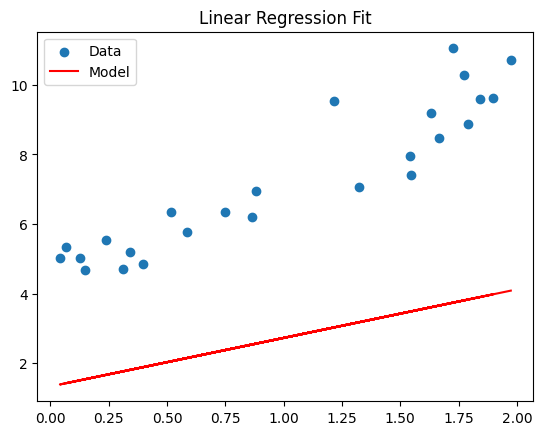

Learned coefficients (m, c): (np.float64(1.395093658748249), np.float64(1.3341239424545215))


In [28]:

model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m, c):", model.coef_)


## 📉 Plot the Loss Curve

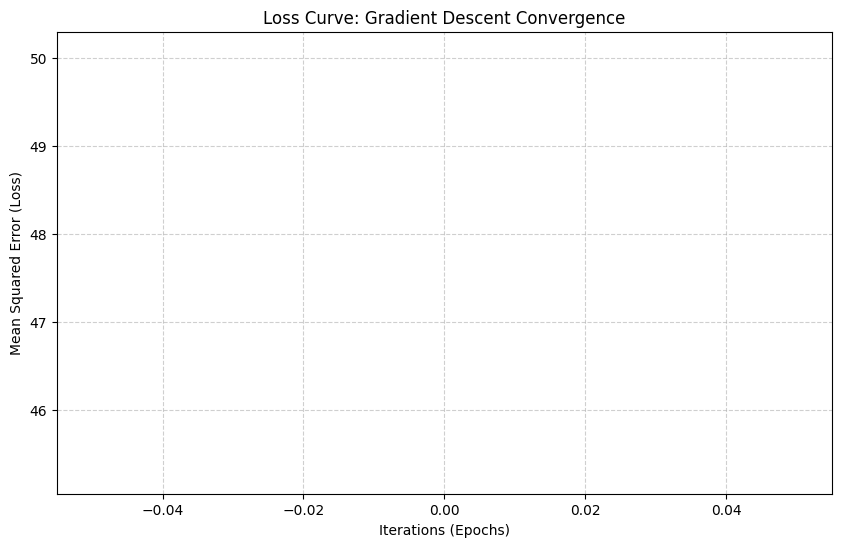

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(model.loss_history)), model.loss_history, color='tab:red', linewidth=2)
plt.xlabel("Iterations (Epochs)")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Loss Curve: Gradient Descent Convergence")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

class MyLinearRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.history = [] # To store cost per epoch

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)

            epoch_loss = 0
            for idx in indices:
                xi = X[idx]
                yi = y[idx]

                # Prediction and update
                y_pred = np.dot(xi, self.weights) + self.bias
                error = y_pred - yi

                self.weights -= self.lr * (2 * error * xi)
                self.bias -= self.lr * (2 * error)

                # Accumulate squared error for the epoch cost
                epoch_loss += error**2

            # Append average MSE for this epoch
            self.history.append(epoch_loss / n_samples)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def plot_cost(self):
        """Plots the cost history over epochs."""
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, len(self.history) + 1), self.history, color='tab:red', lw=2)
        plt.title('Cost Function (MSE) vs. Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Generate data
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Scale features (Crucial for SGD convergence)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = MyLinearRegressionSGD(learning_rate=0.01, epochs=50)
model.fit(X_scaled, y)


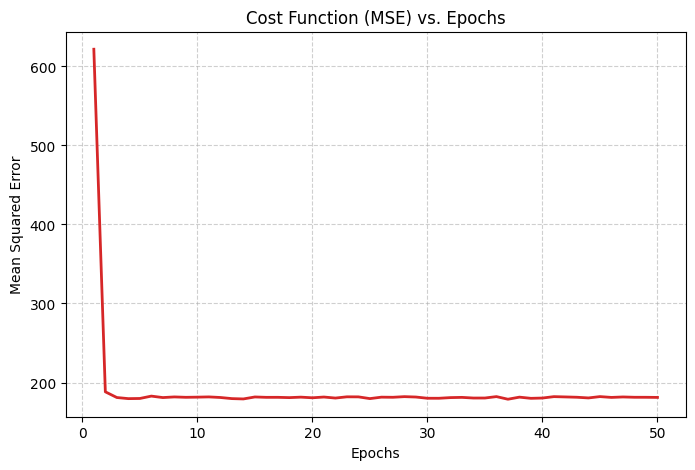

In [31]:
# Plot the results
model.plot_cost()


## Visualize the prediction result of Library version and Custom regression code created

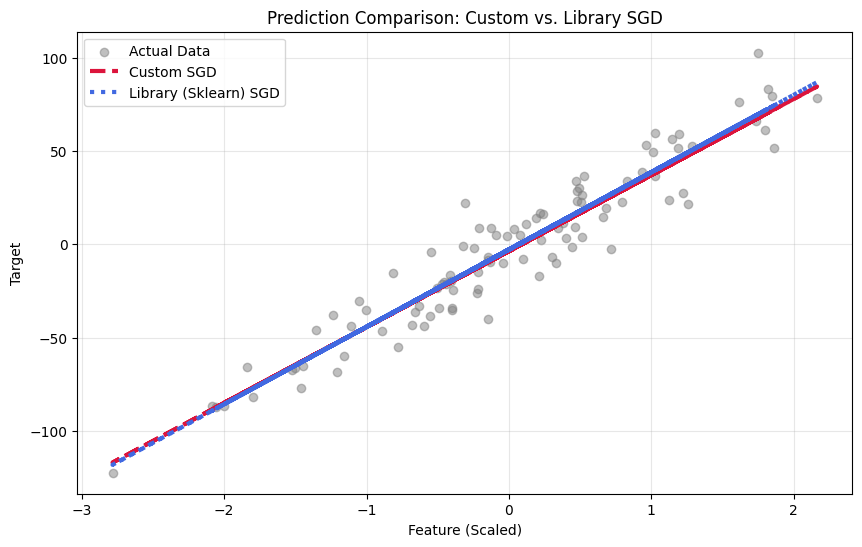

Custom Model Weights: 40.7212, Bias: -3.5520
Library Model Weights: 41.4388, Bias: -2.7649


In [32]:
from sklearn.linear_model import SGDRegressor

# Train Custom Model
custom_model = MyLinearRegressionSGD(learning_rate=0.01, epochs=100)
custom_model.fit(X_scaled, y)
custom_preds = custom_model.predict(X_scaled)

# Train Library Model (Scikit-Learn)
# We set penalty=None to match our simple implementation (no regularization)
lib_model = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=100, penalty=None)
lib_model.fit(X_scaled, y)
lib_preds = lib_model.predict(X_scaled)

# Visualization
plt.figure(figsize=(10, 6))

# Plot the raw data points
plt.scatter(X_scaled, y, color='gray', alpha=0.5, label='Actual Data')

# Plot Custom SGD line
plt.plot(X_scaled, custom_preds, color='crimson', linestyle='--', lw=3, label='Custom SGD')

# Plot Scikit-Learn SGD line
plt.plot(X_scaled, lib_preds, color='royalblue', linestyle=':', lw=3, label='Library (Sklearn) SGD')

plt.title('Prediction Comparison: Custom vs. Library SGD')
plt.xlabel('Feature (Scaled)')
plt.ylabel('Target')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print Coefficients for comparison
print(f"Custom Model Weights: {custom_model.weights[0]:.4f}, Bias: {custom_model.bias:.4f}")
print(f"Library Model Weights: {lib_model.coef_[0]:.4f}, Bias: {lib_model.intercept_[0]:.4f}")

## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version